In [6]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import pandas as pd

In [12]:
data = {'low_scale': {'Team 1': {'simulated_annealing': {'nb_valid': 9, 'time_list': [0.01604999997653067, 0.006710000161547214, 0.01145999995060265, 0.004999999873689376, 0.004850000186706893, 0.007660000119358301, 0.006579999899258837, 0.0058000001445179805, 0.01570999993418809, 0.00534999999217689], 'accuracy_list': [98.14634146341463, 53.220338983050844, 75.5859375, 68.57142857142857, 26.08695652173913, 96.3624073782286, 0, 55.14018691588785, 98.36183065424389, 27.692307692307693]}, 'glouton_search': {'nb_valid': 10, 'time_list': [0.004769999941345304, 0.0020800001948373392, 0.0038600002881139517, 0.002229999881819822, 0.0015899997379165143, 0.0027599999157246202, 0.0025099998310906813, 0.001590000101714395, 0.003139999898849055, 0.0018299997464055195], 'accuracy_list': [100.0, 97.62711864406779, 100.0, 80.0, 100.0, 99.99999334815311, 82.6923076923077, 100.0, 99.97952288317805, 100.0]}, 'tabu_search': {'nb_valid': 10, 'time_list': [3.5744100001465995, 10.856330000024172, 73.99655000008352, 2.513550000003306, 1.8727300001046387, 20.9893799998099, 5.217869999978575, 2.156040000045323, 58.92543000009027, 2.859860000171466], 'accuracy_list': [100.0, 100.0, 100.0, 100.0, 100.0, 99.99999334815311, 90.38461538461539, 100.0, 100.0, 100.0]}}, 'Team 2': {'bruteForce': {'nb_valid': 10, 'time_list': [0.0011500000255182385, 2.0450700001674704, 0.001089999932446517, 0.023359999977401458, 0.02463000018906314, 0.0011199997970834374, 4.11244999995688, 0.2348300000448944, 0.0014799999917158857, 0.051589999930001795], 'accuracy_list': [0.0, 100.0, 0.0, 100.0, 100.0, 0.0, 100.0, 100.0, 0.0, 100.0]}}}, 'large_scale': {'Team 1': {'simulated_annealing': {'nb_valid': 16, 'time_list': [17.779199999858974, 0.9038299998792354, 0.20271000030334108, 2.71945999993477, 0.2070599999569822, 6.3747299998794915, 0.43702000002667774, 11.60411999990174, 0.9892899997794302, 0.11140999995404854, 2.5209100000211038, 0.37799000019731466, 7.30442000021867, 0.43640999974741135, 4.632049999781884, 1.3451499999064254, 0.1366799999232171, 1.6333300001861062, 0.34123000004910864, 2.3671300001296913, 0.423870000304305], 'accuracy_list': [9.158036856401258, 12.237858466506431, 49.896140811194925, 9.92813559322034, 37.88930414664531, 9.68432703820124, 12.790657379491977, 0, 54.794520547945204, 65.52179656538969, 56.345908813916125, 59.1187270501836, 0, 60.227770477441965, 0, 45.7956914523975, 49.77054651647893, 0, 51.7982944011865, 0, 49.402838274553886]}, 'glouton_search': {'nb_valid': 14, 'time_list': [18.889320000016596, 0.7763499997963663, 0.043619999996735714, 1.13524000007601, 0.05063999997219071, 4.35633000015514, 0.27191000008315314, 12.429129999873112, 0.30351999994309153, 0.18333000007260125, 1.5302100000553764, 0.12562000010802876, 3.732540000055451, 0.13063999977021012, 6.134459999884712, 0.2328399998077657, 0.053280000065569766, 0.5748100000346312, 0.042719999692053534, 3.2610599999316037, 0.12193000002298504], 'accuracy_list': [0, 28.598425774727996, 32.61178528479283, 20.350734463276837, 40.4342409681438, 0, 34.48729944207645, 0, 61.56650463985859, 68.75825627476883, 61.387180765608555, 65.60587515299878, 61.730092884840836, 64.62987297415681, 0, 0, 45.76554025865666, 0, 40.674823878383386, 0, 40.97231979766756]}, 'tabu_search': {'nb_valid': 21, 'time_list': [0.00104000027931761, 299051.9550000001, 30.55858999978227, 0.00037000027077738196, 123.72484999978042, 0.00037000027077738196, 696.6576499999064, 0.00041000021155923605, 4323.902529999759, 98.80389999998442, 0.00039999977161642164, 279.3377399997553, 0.0006199999916134402, 1522.319310000239, 0.00034000004234258085, 5282.7898800002, 35.745609999867156, 0.00028000031306874007, 106.98708000018087, 0.0005000001692678779, 702.0953800001735], 'accuracy_list': [0.0, 50.18439351962277, 81.84104077839729, 0.0, 75.80530343477487, 0.0, 49.322521398620786, 0.0, 63.72072470172338, 84.74240422721269, 0.0, 76.80538555691554, 0.0, 66.688567674113, 0.0, 41.62612925642807, 57.98915310805173, 0.0, 44.38264738598443, 0.0, 43.79654348742448]}}, 'Team 2': {'bruteForce': {'nb_valid': 21, 'time_list': [0.00040999984776135534, 0.00025999979698099196, 0.00021999985619913787, 0.00031000017770566046, 0.00027999994927085936, 0.00039999977161642164, 0.00026999987312592566, 0.00044999978854320943, 0.00026999987312592566, 0.00022000021999701858, 0.00030999981390777975, 0.00022000021999701858, 0.0022799998987466097, 0.00027999994927085936, 0.00036000019463244826, 0.00030000010156072676, 0.00018999999156221747, 0.00029999973776284605, 0.00022999993234407157, 0.000549999822396785, 0.00026999987312592566], 'accuracy_list': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}}}}

[0 1 2] ['simulated_annealing', 'glouton_search', 'tabu_search']


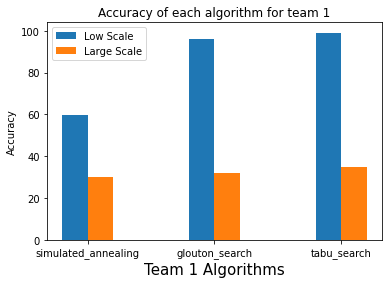

In [85]:
def avg(l):
    return sum(l)/len(l)
#histograms of each algorithm for each team accuarcy mean and time mean
x = np.arange(len(data['low_scale']['Team 1'].keys()))
print(x,list(data['low_scale']['Team 1'].keys()))
plt.bar(x-0.1,[avg(j['accuracy_list']) for j in [i for i in data['low_scale']['Team 1'].values()]],0.2)
plt.bar(x+0.1,[avg(j['accuracy_list']) for j in [i for i in data['large_scale']['Team 1'].values()]],0.2)
plt.xticks(x, list(data['low_scale']['Team 1'].keys()))
plt.xlabel("Team 1 Algorithms", fontsize=15)
plt.ylabel("Accuracy")
plt.title("Accuracy of each algorithm for team 1")
plt.legend(["Low Scale", "Large Scale"])
plt.show()



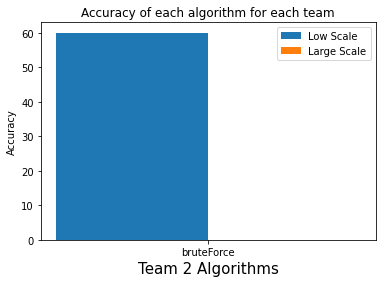

In [84]:
#histograms of each algorithm for each team accuarcy mean and time mean
x = np.arange(len(data['low_scale']['Team 2'].keys()))
plt.bar(x-0.1,[avg(j['accuracy_list']) for j in [i for i in data['low_scale']['Team 2'].values()]],0.2)
plt.bar(x+0.1,[avg(j['accuracy_list']) for j in [i for i in data['large_scale']['Team 2'].values()]],0.2)
plt.xticks(x, list(data['low_scale']['Team 2'].keys()))
plt.xlabel("Team 2 Algorithms", fontsize=15)
plt.ylabel("Accuracy")
plt.title("Accuracy of each algorithm for team 2")
plt.legend(["Low Scale", "Large Scale"])
plt.show()


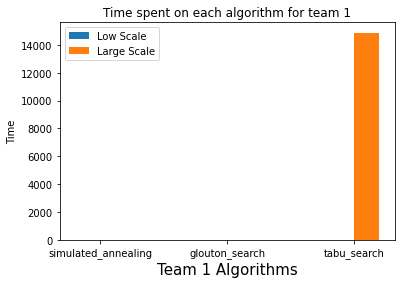

In [83]:
#histograms of each algorithm for each team accuarcy mean and time mean
x = np.arange(len(data['low_scale']['Team 1'].keys()))
plt.bar(x-0.1,[avg(j['time_list']) for j in [i for i in data['low_scale']['Team 1'].values()]],0.2)
plt.bar(x+0.1,[avg(j['time_list']) for j in [i for i in data['large_scale']['Team 1'].values()]],0.2)
plt.xticks(x, list(data['low_scale']['Team 1'].keys()))
plt.xlabel("Team 1 Algorithms", fontsize=15)
plt.ylabel("Time")
plt.title('Time spent on each algorithm for team 1')
plt.legend(["Low Scale", "Large Scale"])
plt.show()


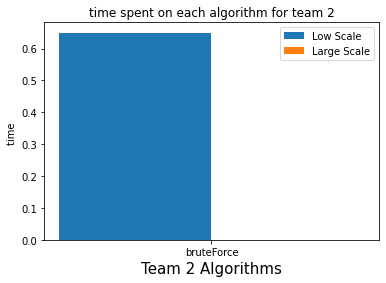

In [82]:
#histograms of each algorithm for each team accuarcy mean and time mean
x = np.arange(len(data['low_scale']['Team 2'].keys()))
plt.bar(x-0.1,[avg(j['time_list']) for j in [i for i in data['low_scale']['Team 2'].values()]],0.2)
plt.bar(x+0.1,[avg(j['time_list']) for j in [i for i in data['large_scale']['Team 2'].values()]],0.2)
plt.xticks(x, list(data['low_scale']['Team 2'].keys()))
plt.xlabel("Team 2 Algorithms", fontsize=15)
plt.ylabel("time ")
plt.title('Time spent on each algorithm for team 2')
plt.legend(["Low Scale", "Large Scale"])
plt.show()

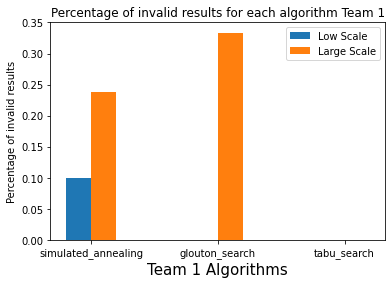

In [86]:
#histograms of each algorithm for each team accuarcy mean and time mean
x = np.arange(len(data['low_scale']['Team 1'].keys()))
plt.bar(x-0.1,[(len(j['time_list'])-j['nb_valid'])/len(j['accuracy_list']) for j in [i for i in data['low_scale']['Team 1'].values()]],0.2)
plt.bar(x+0.1,[(len(j['time_list'])-j['nb_valid'])/len(j['accuracy_list']) for j in [i for i in data['large_scale']['Team 1'].values()]],0.2)
plt.xticks(x, list(data['low_scale']['Team 1'].keys()))
plt.xlabel("Team 1 Algorithms", fontsize=15)
plt.ylabel("Percentage of invalid results")
plt.title("Percentage of invalid results for each algorithm Team 1")
plt.legend(["Low Scale", "Large Scale"])
plt.show()

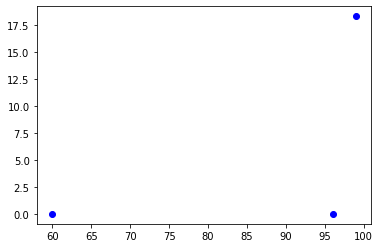

In [80]:
#histograms of each algorithm for each team accuarcy mean and time mean


#list of average accuracy for each algorithm
y = [avg(j['accuracy_list']) for j in [i for i in data['low_scale']['Team 1'].values()]]

#list of average time for each algorithm
z = [avg(j['time_list']) for j in [i for i in data['low_scale']['Team 1'].values()]]

plt.scatter(y, z, c ="blue")
plt.show()

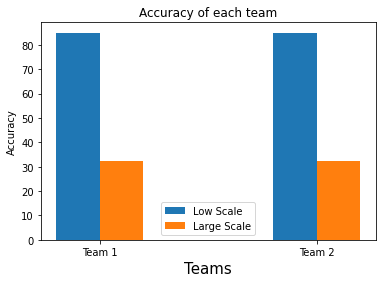

In [93]:
x = np.arange(2)
plt.bar(x-0.1,avg([avg(j['accuracy_list']) for j in [i for i in data['low_scale']['Team 1'].values()]]),0.2)
plt.bar(x+0.1,avg([avg(j['accuracy_list']) for j in [i for i in data['large_scale']['Team 1'].values()]]),0.2)
plt.xticks(x, list(data['low_scale'].keys()))
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Accuracy")
plt.title("Accuracy of each team")
plt.legend(["Low Scale", "Large Scale"])
plt.show()


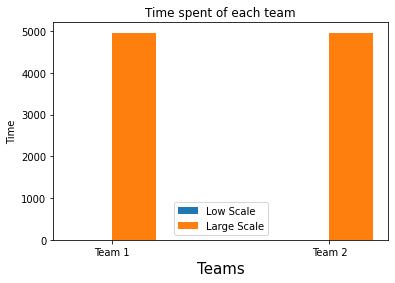

In [92]:
x = np.arange(2)
plt.bar(x-0.1,avg([avg(j['time_list']) for j in [i for i in data['low_scale']['Team 1'].values()]]),0.2)
plt.bar(x+0.1,avg([avg(j['time_list']) for j in [i for i in data['large_scale']['Team 1'].values()]]),0.2)
plt.xticks(x, list(data['low_scale'].keys()))
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Time")
plt.title("Time spent of each team")
plt.legend(["Low Scale", "Large Scale"])
plt.show()
